<a href="https://colab.research.google.com/github/srijapamu25/Project-2/blob/main/Data_Preprocessing_%26_trend_analysis(Opportunity_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('/content/Week-2/Opportunity_cleaned_data.csv')
df.head()

,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17",2023-01-05,0.0,0,0,0.0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37",2023-01-05,0.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,0.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 08:10:07",2023-01-05,0.0,0,0,0.0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47",2023-01-05,0.0,0,0,0.0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17",2023-01-05,0.0,0,0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20322 entries, 0 to 20321
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Profile Id                20322 non-null  object 
 1   Opportunity Id            20322 non-null  object 
 2   Opportunity Name          20322 non-null  object 
 3   Opportunity Category      20322 non-null  object 
 4   Opportunity End Date      20322 non-null  object 
 5   Gender                    20322 non-null  object 
 6   City                      20322 non-null  object 
 7   State                     20322 non-null  object 
 8   Country                   20322 non-null  object 
 9   Zip Code                  20322 non-null  object 
 10  Graduation Date(YYYY MM)  20321 non-null  object 
 11  Current Student Status    20321 non-null  object 
 12  Current/Intended Major    20278 non-null  object 
 13  Status Description        20322 non-null  object 
 14  Apply 

In [4]:
df.shape

(20322, 21)

In [5]:
df.dtypes

,0
Profile Id,object
Opportunity Id,object
Opportunity Name,object
Opportunity Category,object
Opportunity End Date,object
Gender,object
City,object
State,object
Country,object
Zip Code,object


**Handling Outliers and Anomalies**

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [7]:
# Convert date columns to datetime format
date_columns = ["Opportunity End Date", "Apply Date", "Opportunity Start Date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [8]:
# Handling missing values
# Create a dictionary to specify the columns and their fill values
fill_values = {
    "Graduation Date(YYYY MM)": df["Graduation Date(YYYY MM)"].mode()[0],
    "Current Student Status": df["Current Student Status"].mode()[0],
    "Current/Intended Major": "Unknown",
    "Opportunity Start Date": df["Opportunity Start Date"].mode()[0]
}

# Use fillna with the dictionary to perform the operation on the original DataFrame
df.fillna(value=fill_values, inplace=True)

**Normalize numerical features**

In [9]:
# Normalize numerical features
scaler = MinMaxScaler()
df[["Reward Amount", "Skill Points Earned"]] = scaler.fit_transform(df[["Reward Amount", "Skill Points Earned"]])

**One-hot encoding categorical variables**

In [10]:
# One-hot encoding categorical variables
categorical_cols = ["Opportunity Category", "Status Description", "Current Student Status"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [11]:
# Compute opportunity duration (in days)
df['Opportunity Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days

In [12]:
# Dropping colums
df.drop(columns=['Profile Id', 'Opportunity Id', 'Zip Code'], inplace=True)

In [13]:
df

,Opportunity Name,Opportunity End Date,Gender,City,State,Country,Graduation Date(YYYY MM),Current/Intended Major,Apply Date,Opportunity Start Date,...,Status Description_Not Started,Status Description_Rejected,Status Description_Rewards Award,Status Description_Started,Status Description_Team Allocated,Status Description_Withdraw,Current Student Status_High School Student,Current Student Status_Not in Education,Current Student Status_Undergraduate Student,Opportunity Duration
0,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,dhaka,Savar,Bangladesh,2023-06,Data Science,2022-10-03 17:29:17,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
1,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,amritsar,Punjab,Afghanistan,2021-01,Otheraassss,2023-01-05 18:58:37,2023-01-05,...,False,False,True,False,False,False,False,False,True,0
2,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,satna,Madhya pradesh,India,2023-04,Computer Science and Engineering,2022-10-04 08:10:07,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
3,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,hyderabad,Telangana,India,2024-12,Computer Science,2022-10-05 13:41:47,2023-01-05,...,True,False,False,False,False,False,False,False,False,0
4,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,bangalore,Karnataka,India,2022-06,jknhk,2022-10-05 11:07:17,2023-01-05,...,True,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,AI Ethics Challenge,2023-10-31 14:45:36,m,bijnor,Uttar Pradesh,India,2020-07,Software Engineering,2023-07-19 06:36:27,2023-09-04,...,False,False,False,False,True,False,False,False,False,57
20318,AI Ethics Challenge,2023-10-31 14:45:36,m,college station,Texas,United States,2024-05,Industrial Engineering,2023-09-02 15:34:23,2023-08-07,...,False,False,False,False,False,False,False,False,False,85
20319,AI Ethics Challenge,2023-10-31 14:45:36,f,narasaraopet,Andhra Pradesh,India,2023-06,Computer Science,2023-09-22 04:13:06,2023-08-07,...,False,False,False,False,False,False,False,False,False,85
20320,AI Ethics Challenge,2023-10-31 14:45:36,f,saint louis,Missouri,United States,2025-05,Health Data Science,2023-10-25 06:29:07,2023-08-07,...,False,False,False,False,False,False,False,False,False,85


**Key Insights**

The dataset has been successfully preprocessed with the following improvements:

Dates Converted: Opportunity End Date, Apply Date, and Opportunity Start Date are now in datetime format.

Missing Values Handled: Key columns like Graduation Date, Current Student Status, and Current/Intended Major are filled with appropriate values.

Normalization Applied: Reward Amount and Skill Points Earned are scaled using Min-Max normalization.

Categorical Encoding: One-hot encoding applied to Opportunity Category, Status Description, and Current Student Status.

Feature Engineering: Opportunity Duration (days between start and end date) is calculated.

Dropped Unnecessary Columns: Profile Id, Opportunity Id, and Zip Code are removed.


In [14]:
# Save the DataFrame to a CSV file
df.to_csv('preprocessed_opportunity_data.csv', index=False)

**TREND ANALYSIS**

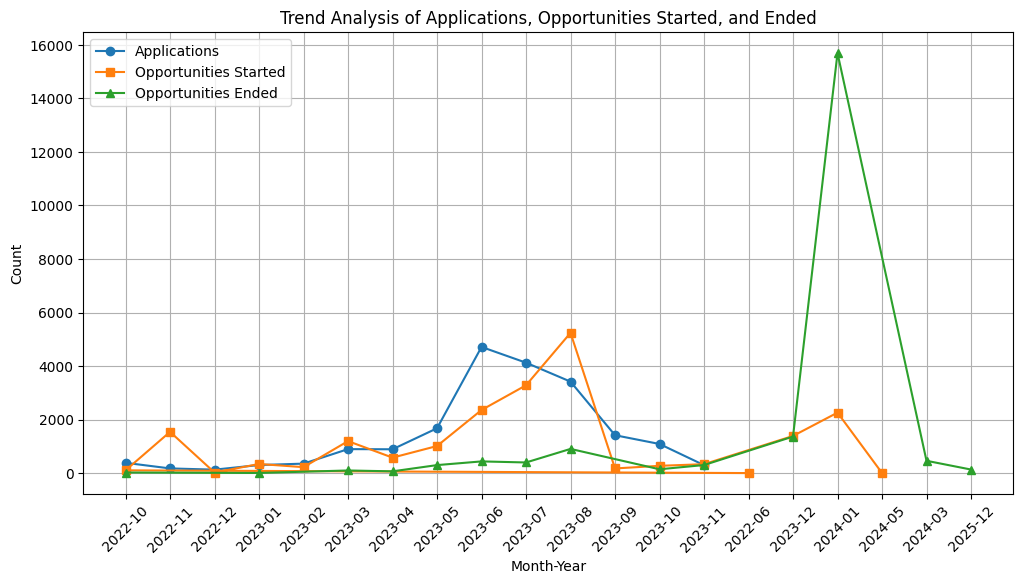

In [15]:
# Extracting 'year' and 'month' from the relevant date columns
df["Apply Month"] = df["Apply Date"].dt.to_period("M")
df["Start Month"] = df["Opportunity Start Date"].dt.to_period("M")
df["End Month"] = df["Opportunity End Date"].dt.to_period("M")

# Aggregate data by month (number of applications, opportunities started, and ended)
apply_trend = df["Apply Month"].value_counts().sort_index()
start_trend = df["Start Month"].value_counts().sort_index()
end_trend = df["End Month"].value_counts().sort_index()

# Plot the trend analysis
plt.figure(figsize=(12, 6))
plt.plot(apply_trend.index.astype(str), apply_trend.values, marker="o", label="Applications")
plt.plot(start_trend.index.astype(str), start_trend.values, marker="s", label="Opportunities Started")
plt.plot(end_trend.index.astype(str), end_trend.values, marker="^", label="Opportunities Ended")

plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Trend Analysis of Applications, Opportunities Started, and Ended")
plt.legend()
plt.grid()
plt.show()

**COMPARATIVE ANALYSIS**

In [16]:
pip install pandas matplotlib seaborn

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('/content/Week-2/preprocessed_opportunity_data.csv')
df.head()

,Opportunity Name,Opportunity End Date,Gender,City,State,Country,Graduation Date(YYYY MM),Current/Intended Major,Apply Date,Opportunity Start Date,...,Status Description_Not Started,Status Description_Rejected,Status Description_Rewards Award,Status Description_Started,Status Description_Team Allocated,Status Description_Withdraw,Current Student Status_High School Student,Current Student Status_Not in Education,Current Student Status_Undergraduate Student,Opportunity Duration
0,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,dhaka,Savar,Bangladesh,2023-06,Data Science,2022-10-03 17:29:17,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
1,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,amritsar,Punjab,Afghanistan,2021-01,Otheraassss,2023-01-05 18:58:37,2023-01-05,...,False,False,True,False,False,False,False,False,True,0
2,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,f,satna,Madhya pradesh,India,2023-04,Computer Science and Engineering,2022-10-04 08:10:07,2023-01-05,...,True,False,False,False,False,False,True,False,False,0
3,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,hyderabad,Telangana,India,2024-12,Computer Science,2022-10-05 13:41:47,2023-01-05,...,True,False,False,False,False,False,False,False,False,0
4,Statement of Purpose (SOP) Writing Workshop,2023-01-05 18:58:39,m,bangalore,Karnataka,India,2022-06,jknhk,2022-10-05 11:07:17,2023-01-05,...,True,False,False,False,False,False,False,False,True,0


In [19]:
df.columns

Index(['Opportunity Name', 'Opportunity End Date', 'Gender', 'City', 'State',
       'Country', 'Graduation Date(YYYY MM)', 'Current/Intended Major',
       'Apply Date', 'Opportunity Start Date', 'Reward Amount', 'Badge Id',
       'Badge Name', 'Skill Points Earned', 'Skills Earned',
       'Opportunity Category_Course', 'Opportunity Category_Engagement',
       'Opportunity Category_Event', 'Opportunity Category_Internship',
       'Status Description_Dropped Out', 'Status Description_Not Started',
       'Status Description_Rejected', 'Status Description_Rewards Award',
       'Status Description_Started', 'Status Description_Team Allocated',
       'Status Description_Withdraw',
       'Current Student Status_High School Student',
       'Current Student Status_Not in Education',
       'Current Student Status_Undergraduate Student', 'Opportunity Duration'],
      dtype='object')

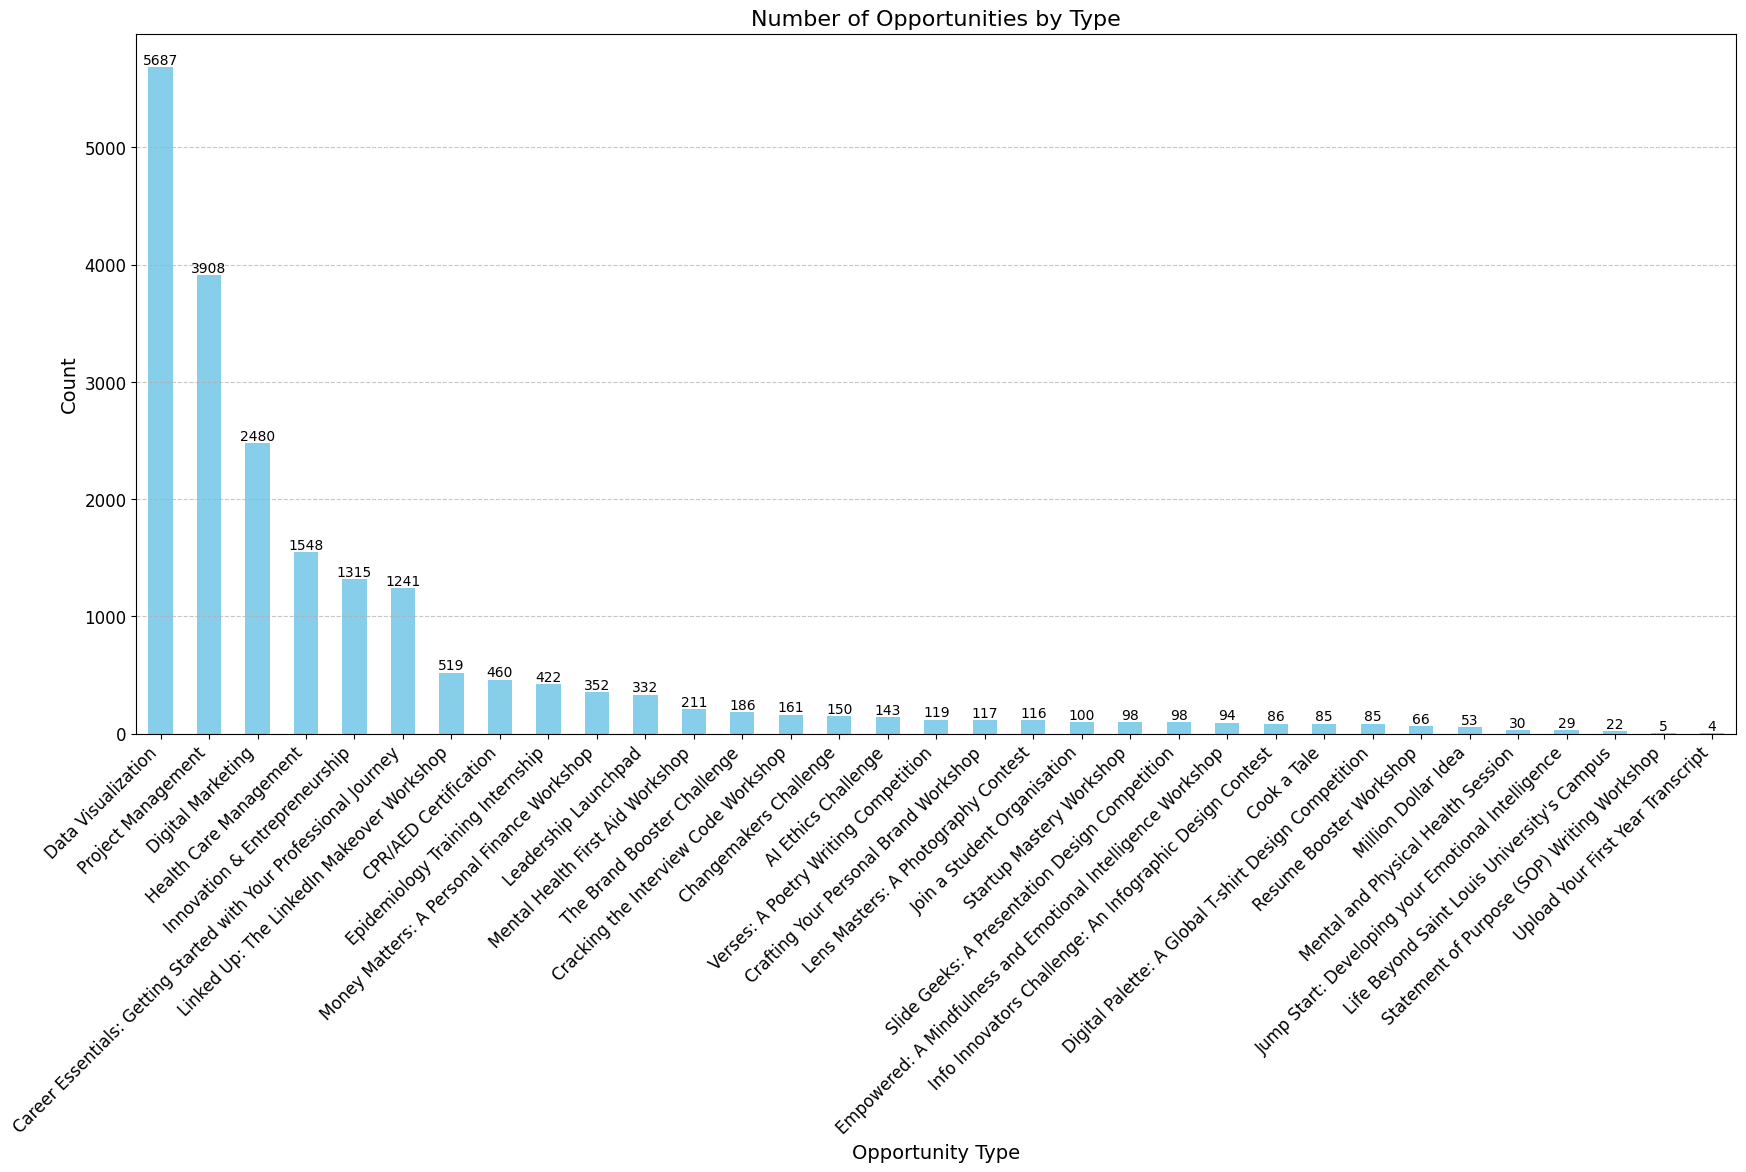

In [20]:
# 1. Opportunity Types
opportunity_counts = df['Opportunity Name'].value_counts()

# Check if opportunity_counts is empty
if opportunity_counts.empty:
    print("Error: 'Opportunity Name' column might be empty or have no variations.")
else:
    plt.figure(figsize=(20, 10))
    opportunity_counts.plot(kind='bar', color='skyblue')

    plt.title('Number of Opportunities by Type', fontsize=16)
    plt.xlabel('Opportunity Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    # Add data labels on top of bars
    for i, count in enumerate(opportunity_counts):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Improve spacing around the plot
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9)

    plt.show()

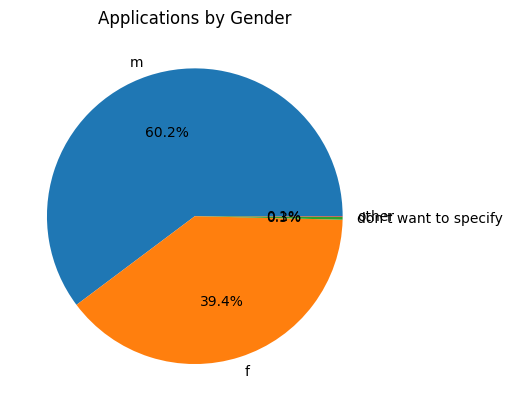

In [21]:
# 2. Applications by Gender (Example)
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Applications by Gender')
plt.ylabel('')
plt.show()

**CROSS-DATASET ANALYSIS**

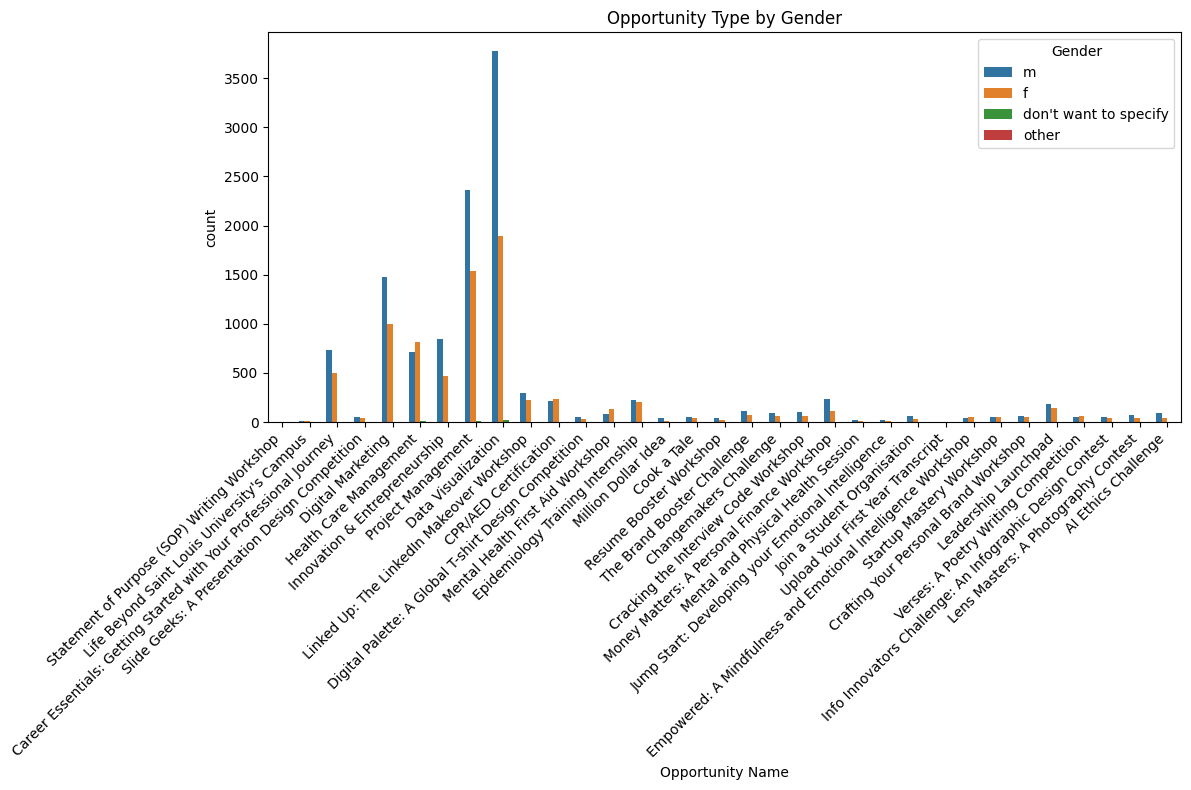

In [22]:
# 1. Demographics and Opportunity Type
plt.figure(figsize=(12, 8))
sns.countplot(x='Opportunity Name', hue='Gender', data=df)
plt.title('Opportunity Type by Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()